In [1]:
from copy import deepcopy
from pathlib import Path
import cv2
import matplotlib.pylab as plt
import numpy as np
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import cv2
import pandas as pd
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 


In [2]:
df = pd.read_csv('df_to_analyze.csv')

# Fish Trajectories plot together

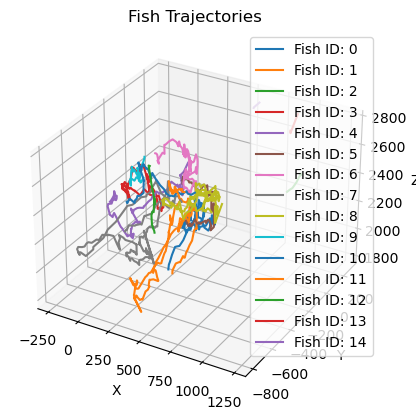

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure()

# Create 3D Axes
ax = fig.add_subplot(111, projection='3d')

# Iterate over each fish ID and plot its trajectory
for fish_id in df['fish_id'].unique():
    fish_data = df[df['fish_id'] == fish_id]
    ax.plot(fish_data['x'], fish_data['y'], fish_data['z'], label=f'Fish ID: {fish_id}')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Fish Trajectories')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Fish Trajectories plots seperate

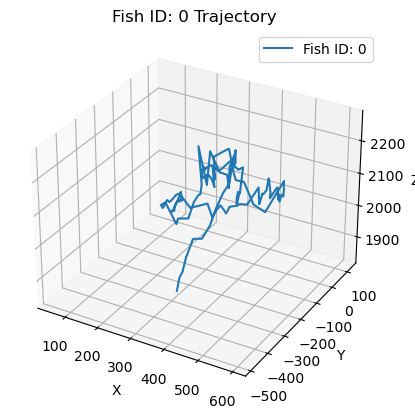

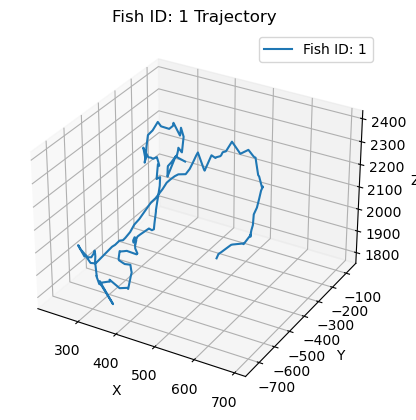

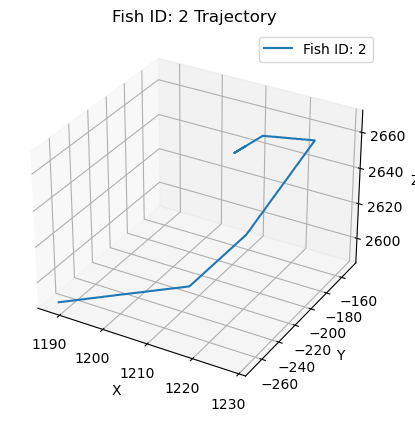

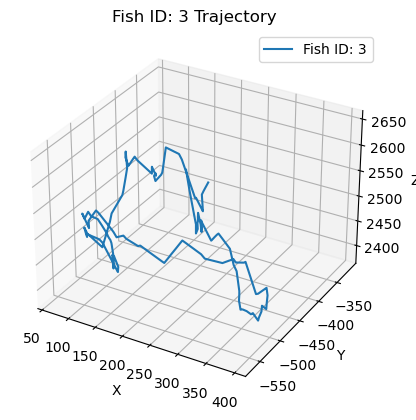

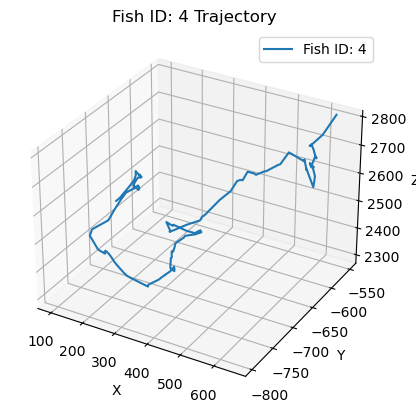

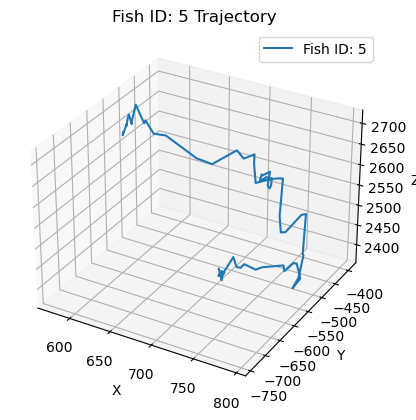

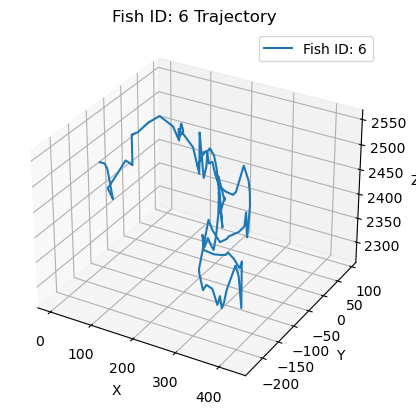

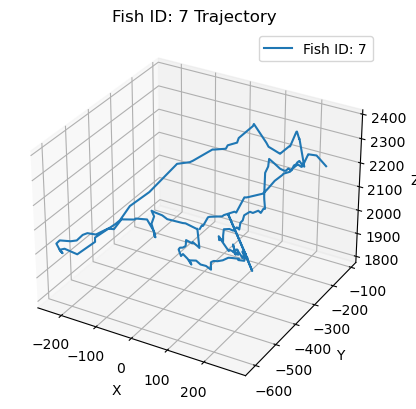

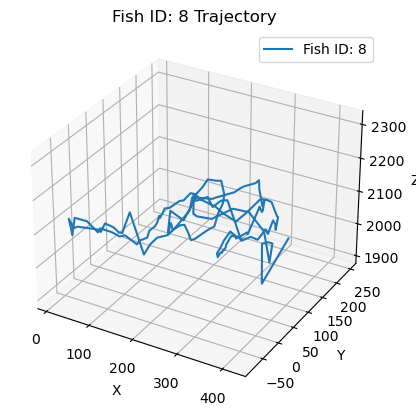

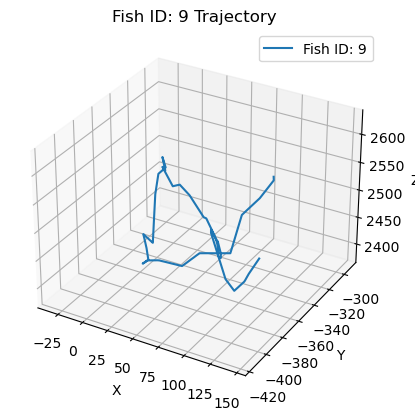

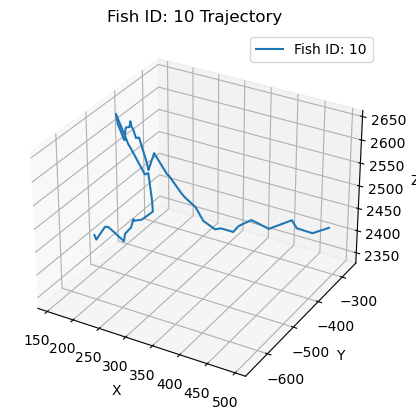

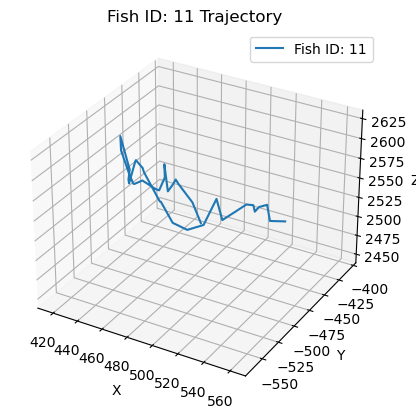

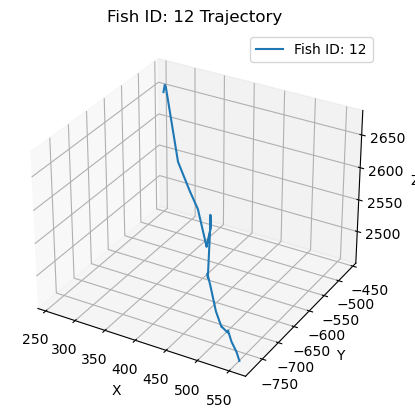

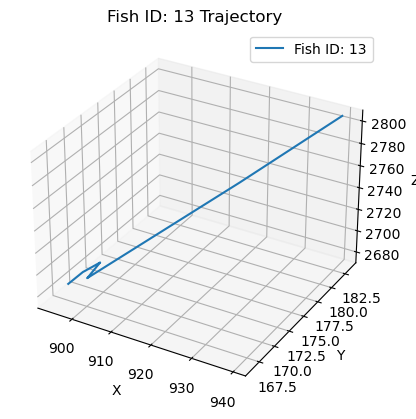

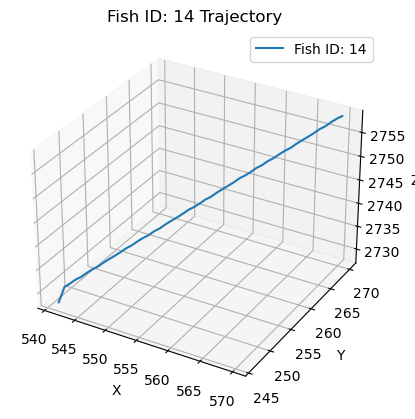

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your dataframe is named 'df'
# Replace 'df' with the actual name if different

# Sample data loading (replace this with your actual data loading)
# df = pd.read_csv('your_dataframe.csv')

# Group the dataframe by fish_id
grouped = df.groupby('fish_id')

# Iterate over each group (each fish ID) and create a separate plot
for fish_id, group in grouped:
    # Create a new figure for each fish ID
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the trajectory of the current fish ID
    ax.plot(group['x'], group['y'], group['z'], label=f'Fish ID: {fish_id}')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Fish ID: {fish_id} Trajectory')
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()


# Fish Speed Analysis

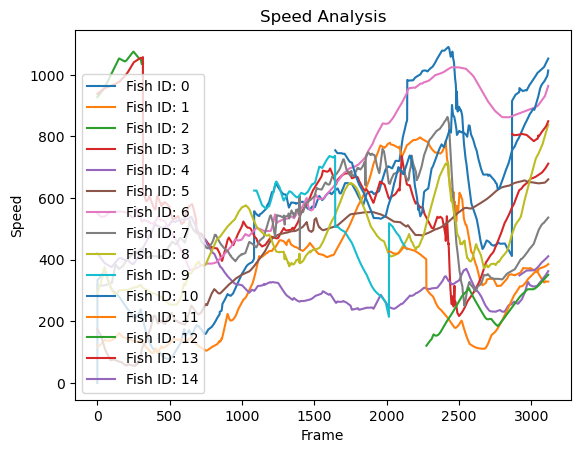

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate speed
df['speed'] = ((df['x'].diff()**2 + df['y'].diff()**2 + df['z'].diff()**2) ** 0.5).fillna(0)

# Plot speed over time for each fish ID
for fish_id, group in df.groupby('fish_id'):
    plt.plot(group['frame'], group['speed'], label=f'Fish ID: {fish_id}')

plt.xlabel('Frame')
plt.ylabel('Speed')
plt.title('Speed Analysis')
plt.legend()
plt.show()


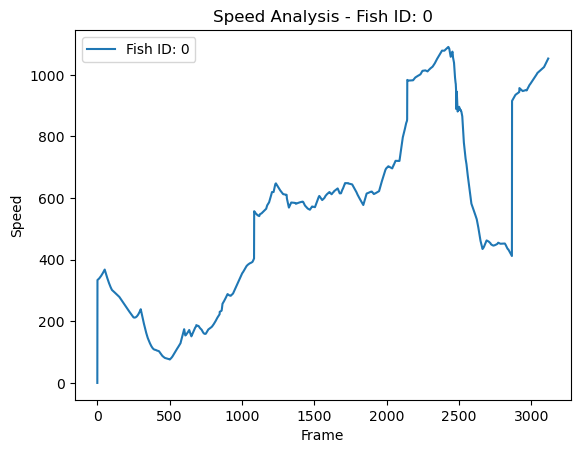

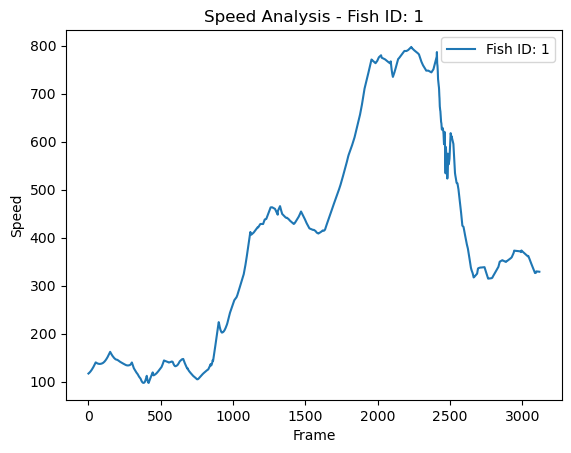

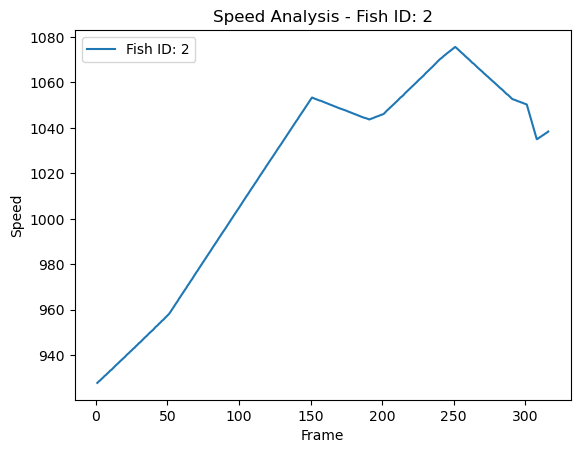

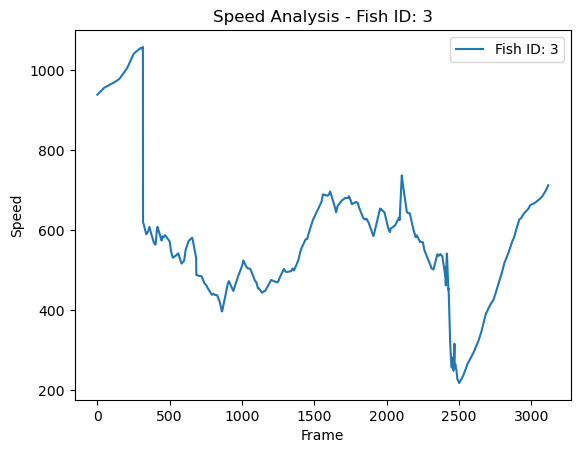

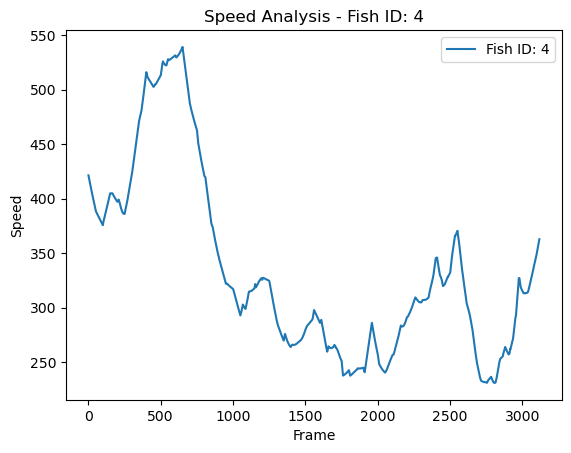

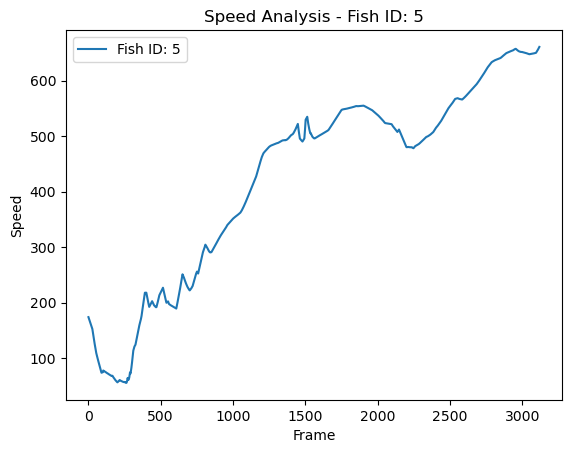

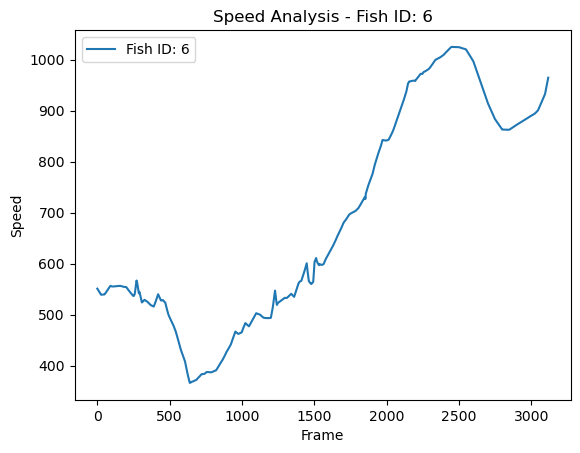

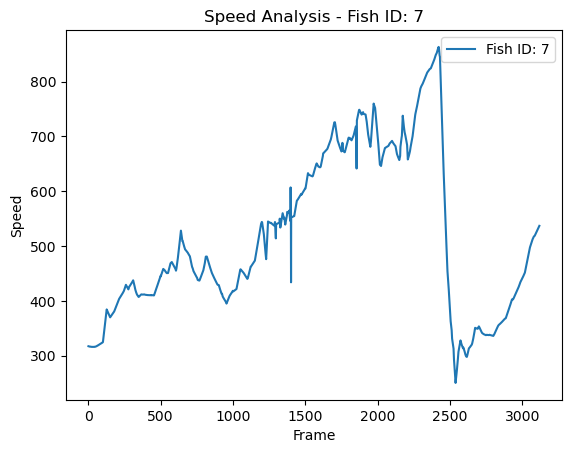

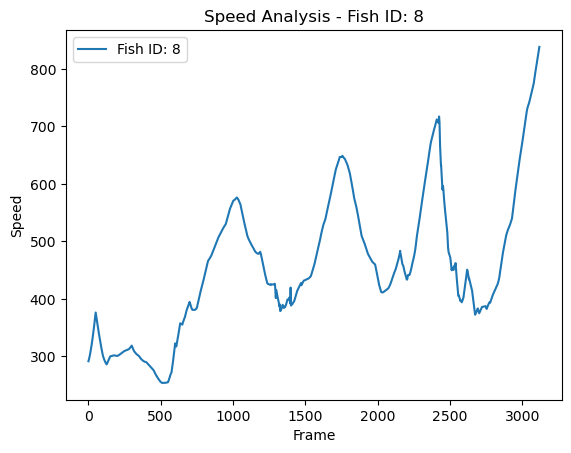

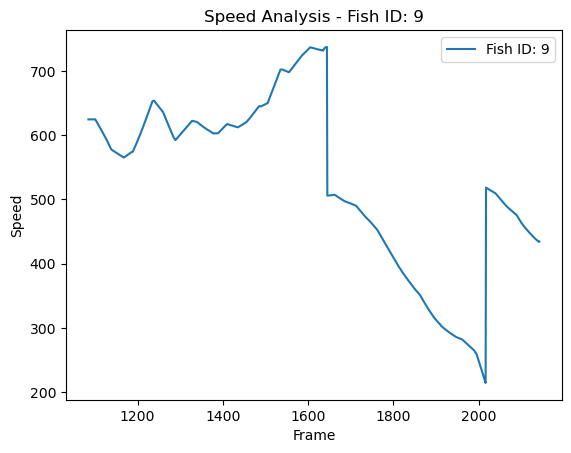

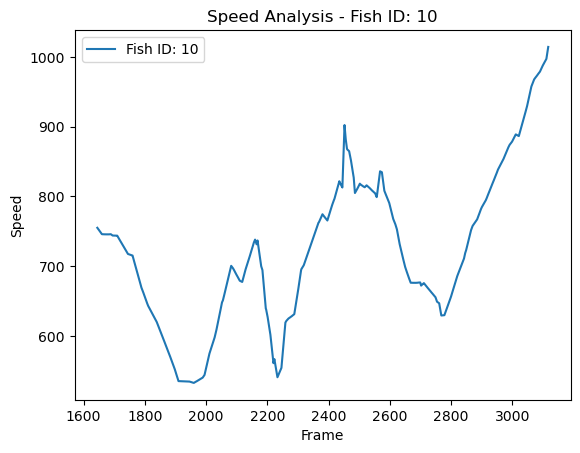

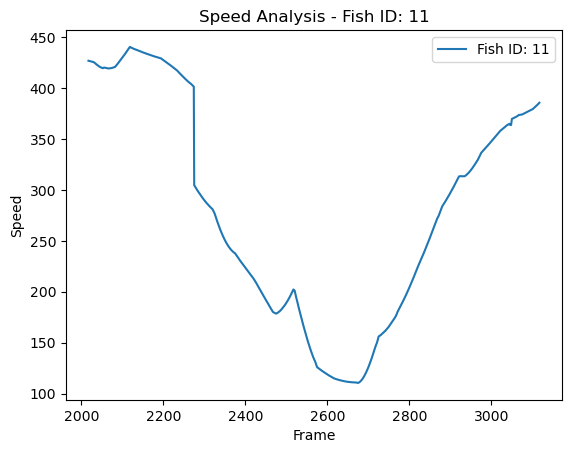

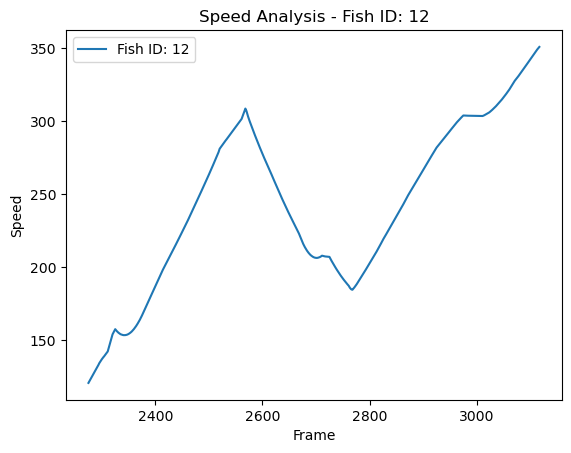

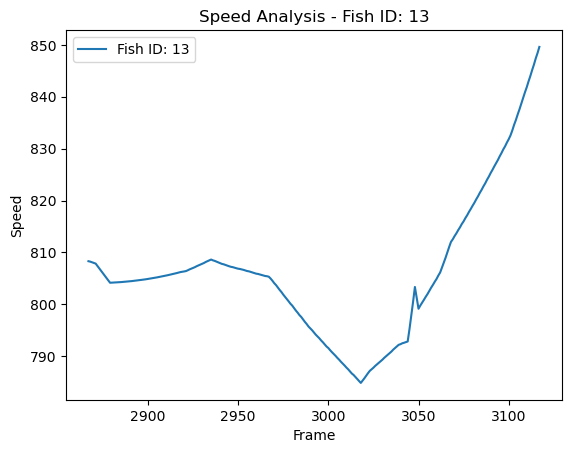

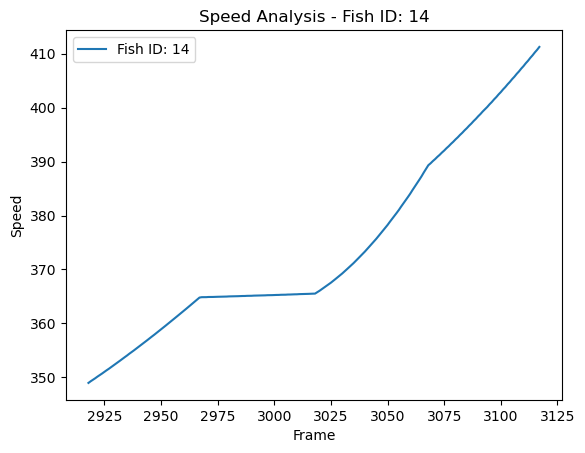

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe

# Calculate speed
df['speed'] = ((df['x'].diff()**2 + df['y'].diff()**2 + df['z'].diff()**2) ** 0.5).fillna(0)

# Plot speed over time for each fish ID
for fish_id, group in df.groupby('fish_id'):
    plt.plot(group['frame'], group['speed'], label=f'Fish ID: {fish_id}')
    plt.xlabel('Frame')
    plt.ylabel('Speed')
    plt.title(f'Speed Analysis - Fish ID: {fish_id}')
    plt.legend()
    plt.show()


In [12]:
# Calculate summary statistics of speed for each fish ID
speed_stats = df.groupby('fish_id')['speed'].describe()

# Compare speed distributions between different fish IDs using statistical tests
# For example, you can perform ANOVA to test for differences in means
from scipy.stats import f_oneway
anova_result = f_oneway(*[group['speed'] for fish_id, group in df.groupby('fish_id')])
anova_result

F_onewayResult(statistic=1314.9677088504507, pvalue=0.0)

In [24]:
import pandas as pd

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Calculate speed per fish per frame
df['speed'] = ((df.groupby('fish_id')['x'].diff()**2 + df.groupby('fish_id')['y'].diff()**2 + df.groupby('fish_id')['z'].diff()**2) ** 0.5).fillna(0)

# Calculate acceleration per fish per frame
df['acceleration'] = df.groupby('fish_id')['speed'].diff().fillna(0)

# Pair speed and acceleration together
speed_acceleration_pairs = df[['fish_id', 'frame', 'speed', 'acceleration']]

display(speed_acceleration_pairs)


,fish_id,frame,speed,acceleration
0,0,1,0.000000,0.000000
1,1,1,0.000000,0.000000
2,2,1,0.000000,0.000000
3,3,1,0.000000,0.000000
4,4,1,0.000000,0.000000
...,...,...,...,...
30173,4,3117,0.472415,-0.031104
30174,5,3117,2.548532,-0.129649
30175,6,3117,0.362444,0.059379
30176,7,3117,0.520829,0.012908


conclude that there are statistically significant differences in mean speed between at least two of the groups (fish IDs)

# Fish Acceleration Analysis

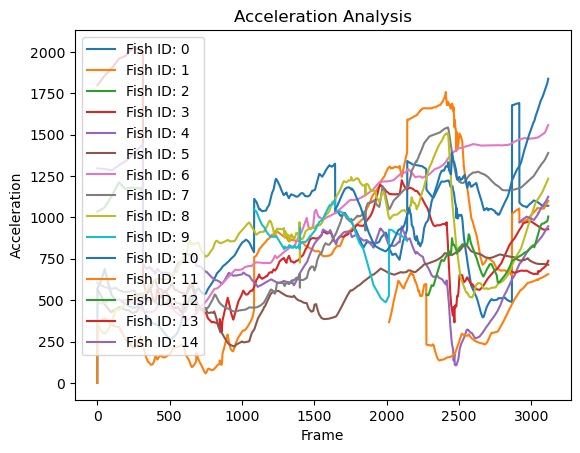

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate acceleration
df['acceleration'] = ((df['x'].diff().diff()**2 + df['y'].diff().diff()**2 + df['z'].diff().diff()**2) ** 0.5).fillna(0)

# Plot acceleration over time for each fish ID
for fish_id, group in df.groupby('fish_id'):
    plt.plot(group['frame'], group['acceleration'], label=f'Fish ID: {fish_id}')

plt.xlabel('Frame')
plt.ylabel('Acceleration')
plt.title('Acceleration Analysis')
plt.legend()
plt.show()


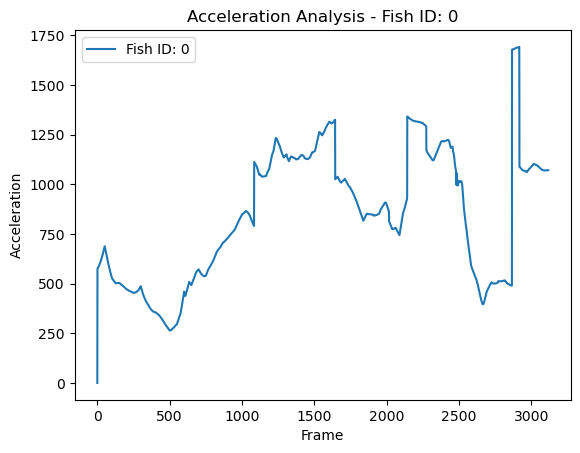

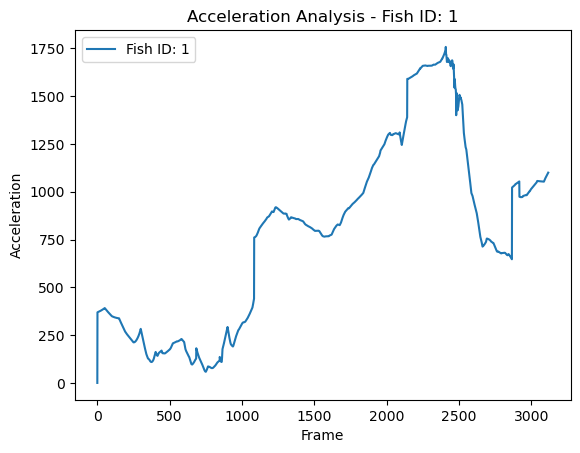

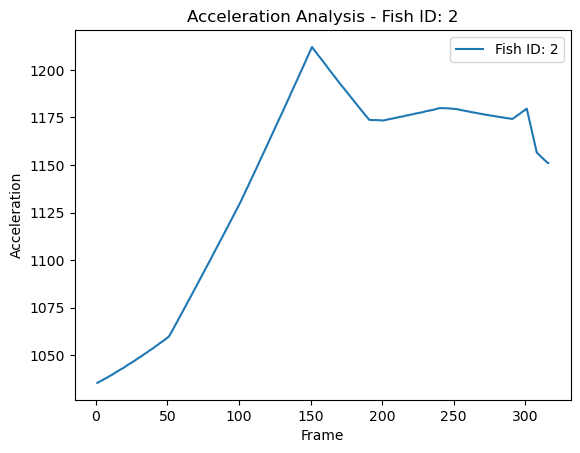

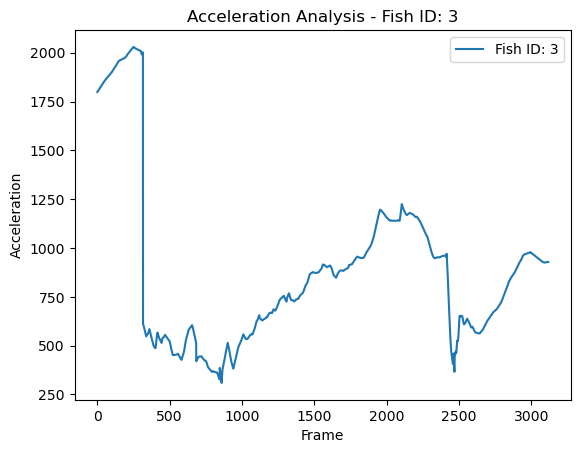

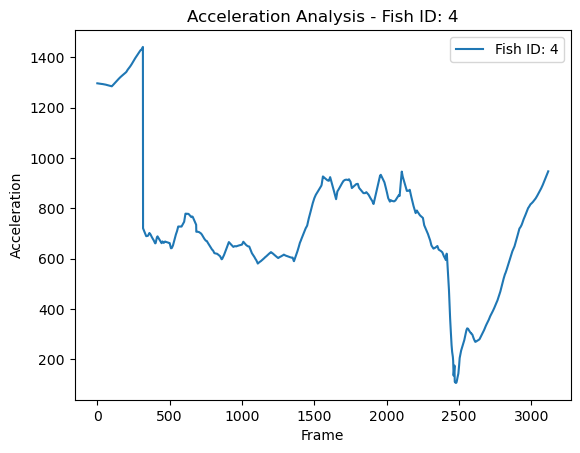

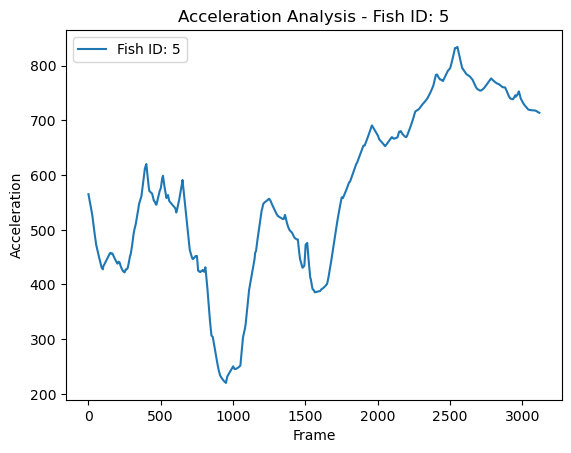

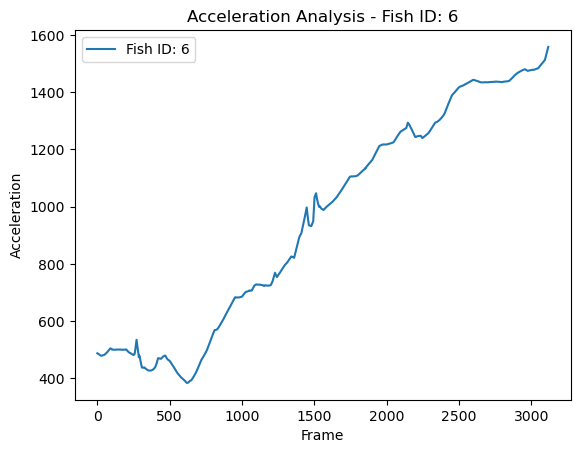

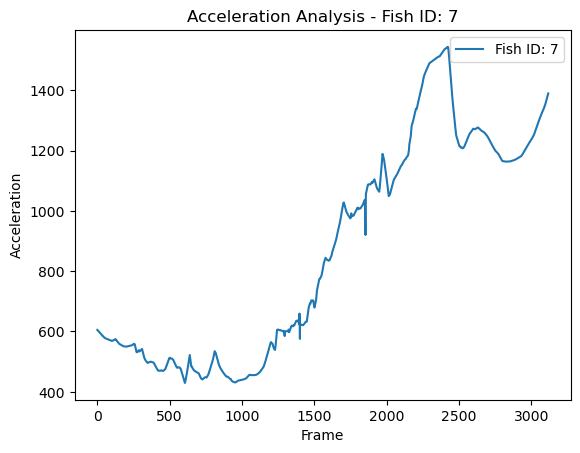

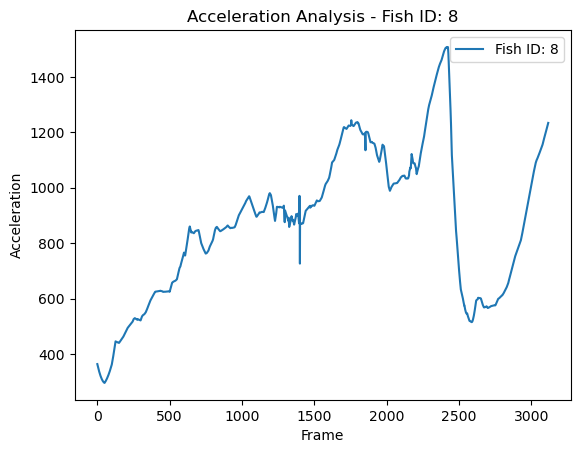

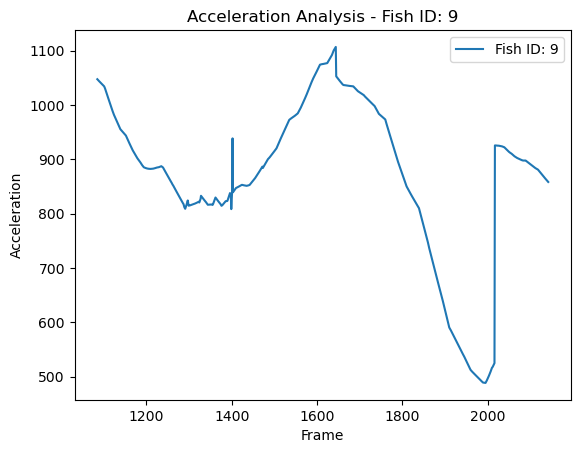

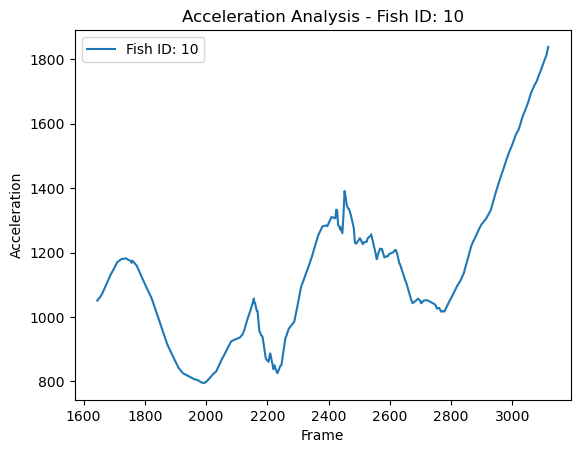

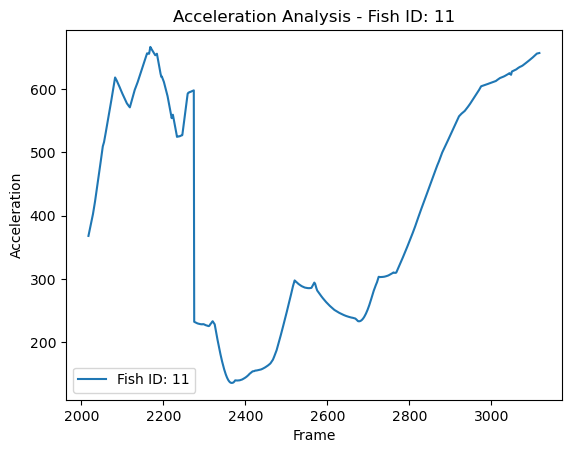

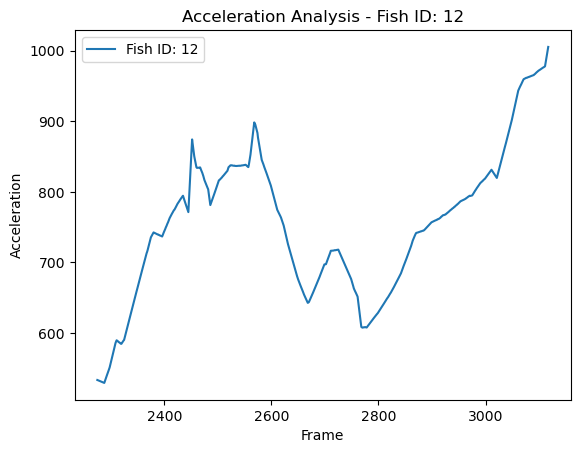

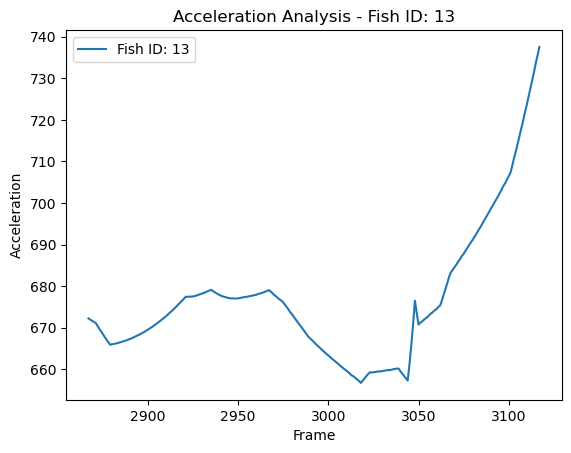

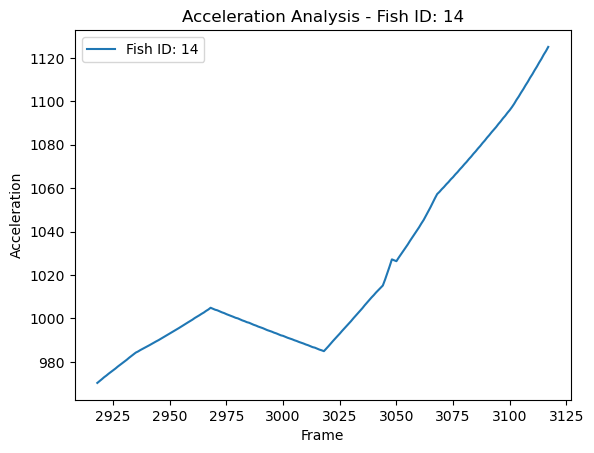

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe

# Calculate acceleration
df['acceleration'] = ((df['x'].diff().diff()**2 + df['y'].diff().diff()**2 + df['z'].diff().diff()**2) ** 0.5).fillna(0)

# Plot acceleration over time for each fish ID
for fish_id, group in df.groupby('fish_id'):
    plt.plot(group['frame'], group['acceleration'], label=f'Fish ID: {fish_id}')
    plt.xlabel('Frame')
    plt.ylabel('Acceleration')
    plt.title(f'Acceleration Analysis - Fish ID: {fish_id}')
    plt.legend()
    plt.show()


In [16]:
# Calculate summary statistics of acceleration for each fish ID
acceleration_stats = df.groupby('fish_id')['acceleration'].describe()

# Investigate differences in acceleration patterns between fish IDs using statistical tests
# For example, you can perform a t-test to compare acceleration means between two groups
from scipy.stats import ttest_ind
acceleration_comparison = ttest_ind(df[df['fish_id'] == 1]['acceleration'], df[df['fish_id'] == 2]['acceleration'])

# Explore correlations between acceleration and speed
acceleration_speed_correlation = df[['acceleration', 'speed']].corr()

print(acceleration_comparison)
print(acceleration_speed_correlation)

TtestResult(statistic=-13.54169627360595, pvalue=9.704065850131604e-41, df=3431.0)
              acceleration     speed
acceleration      1.000000  0.715821
speed             0.715821  1.000000


Overall, these results suggest that there are significant differences in acceleration between the two groups (as indicated by the t-test), and there is a moderate positive correlation between acceleration and speed.

# Fish Path Length

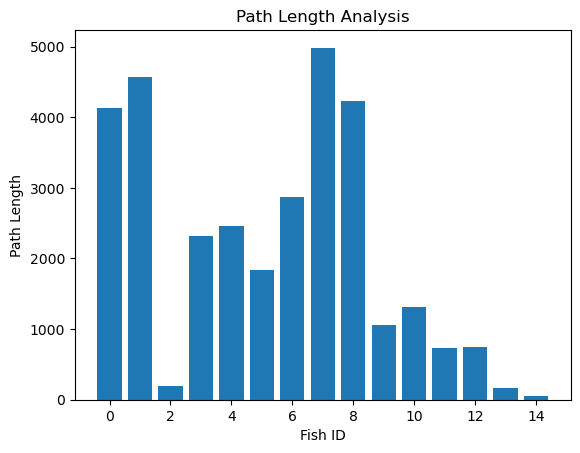

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate path length for each fish ID
path_lengths = df.groupby('fish_id').apply(lambda group: ((group['x'].diff()**2 + group['y'].diff()**2 + group['z'].diff()**2) ** 0.5).sum())

# Plot path length for each fish ID
plt.bar(path_lengths.index, path_lengths.values)
plt.xlabel('Fish ID')
plt.ylabel('Path Length')
plt.title('Path Length Analysis')
plt.show()


In [20]:
# Calculate total path length covered by each fish ID
path_lengths = df.groupby('fish_id').apply(lambda group: ((group['x'].diff()**2 + group['y'].diff()**2 + group['z'].diff()**2) ** 0.5).sum())

# Compare path lengths between different fish IDs using descriptive statistics
# For example, you can calculate mean path length for each group
mean_path_length = path_lengths.mean()
mean_path_length

2110.8737815857103

The output "mean path length: 2110.87" indicates the average path length covered by the fish across all fish IDs in your dataset.

# Fish Spatial Distribution

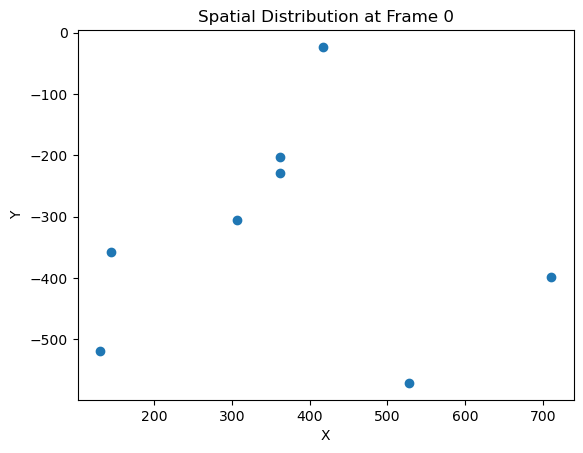

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Spatial distribution plot at specific frame (e.g., frame 0)
frame = 800
plt.scatter(df[df['frame'] == frame]['x'], df[df['frame'] == frame]['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution at Frame 0')
plt.show()

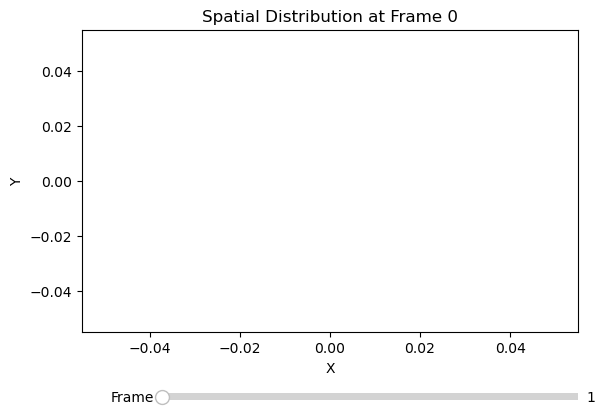

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

# Assuming 'df' is your dataframe

# Create figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Initial frame
frame_initial = 0

# Plot initial spatial distribution
sc = ax.scatter(df[df['frame'] == frame_initial]['x'], df[df['frame'] == frame_initial]['y'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Spatial Distribution at Frame {frame_initial}')

# Add slider
frame_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(frame_slider, 'Frame', df['frame'].min(), df['frame'].max(), valinit=frame_initial, valstep=1)

# Update function for animation
def update(frame):
    ax.cla()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Spatial Distribution at Frame {frame}')
    sc = ax.scatter(df[df['frame'] == frame]['x'], df[df['frame'] == frame]['y'])

# FuncAnimation to update the plot with the slider
ani = FuncAnimation(fig, update, frames=df['frame'].unique(), interval=50)

# Function to update plot when slider value changes
def slider_update(val):
    update(int(val))

slider.on_changed(slider_update)

plt.show()


# Heatmap of Fish Density

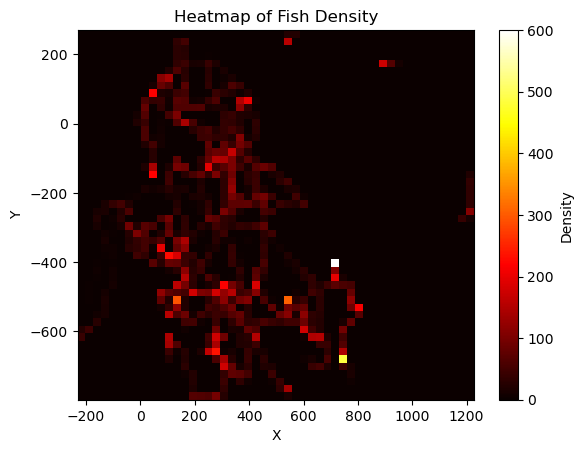

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a 2D histogram (heatmap) of fish density
plt.hist2d(df['x'], df['y'], bins=50, cmap='hot')
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Fish Density')
plt.show()


# Clustering Analysis (K-means):

In [26]:
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['speed', 'acceleration']]

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

/Users/chaimelchik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,frame,fish_id,x,y,z,speed,acceleration,cluster
0,1,0,475.641316,-251.609266,2175.999486,0.000000,0.000000,0
1,1,1,358.941668,-255.299200,2170.809067,0.000000,0.000000,0
2,1,2,1187.891829,-270.103752,2587.299296,0.000000,0.000000,0
3,1,3,273.150068,-478.047934,2606.051411,0.000000,0.000000,0
4,1,4,634.803972,-551.119175,2809.724279,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
30173,3117,4,116.005151,-677.619052,2495.082079,0.472415,-0.031104,0
30174,3117,5,770.093280,-740.882905,2565.283206,2.548532,-0.129649,0
30175,3117,6,26.176099,-131.034777,2496.313876,0.362444,0.059379,0
30176,3117,7,153.822302,-587.537830,2244.230237,0.520829,0.012908,0


In [28]:
# Assuming 'df' is your dataframe containing the clustering results

# Analyze the characteristics of each cluster
cluster_characteristics = df.groupby('cluster').agg({
    'speed': ['mean', 'std'],  # Mean and standard deviation of speed
    'acceleration': ['mean', 'std'],  # Mean and standard deviation of acceleration
    # You can add more characteristics as needed
})

# Print the characteristics of each cluster
display(cluster_characteristics)


speed            acceleration           
              mean        std         mean        std
cluster                                              
0         1.023286   1.397861     0.000682   0.565580
1        94.659338  58.801059    60.098584  41.893871
2         6.570034  11.626527   -79.865506  54.435103

Cluster 0:

Mean speed: 1.02 units/frame (std: 1.40)
Mean acceleration: 0.0007 units/frame^2 (std: 0.57)
This cluster appears to represent fish with relatively low and consistent speed and acceleration values.

Cluster 1:

Mean speed: 94.66 units/frame (std: 58.80)
Mean acceleration: 60.10 units/frame^2 (std: 41.89)
This cluster likely represents fish with high and variable speed and acceleration values, indicating highly active or erratic movement patterns.

Cluster 2:

Mean speed: 6.57 units/frame (std: 11.63)
Mean acceleration: -79.87 units/frame^2 (std: 54.44)
The negative mean acceleration suggests that the fish in this cluster may be decelerating, possibly indicating specific behaviors such as stopping or changing direction frequently.
These conclusions provide insights into the distinct movement patterns captured by the clustering algorithm, helping to categorize fish behavior into different groups based on their speed and acceleration characteristics. Further analysis and interpretation can be performed based on these findings to understand the underlying factors contributing to the observed patterns.

# Behavioral Analysis:

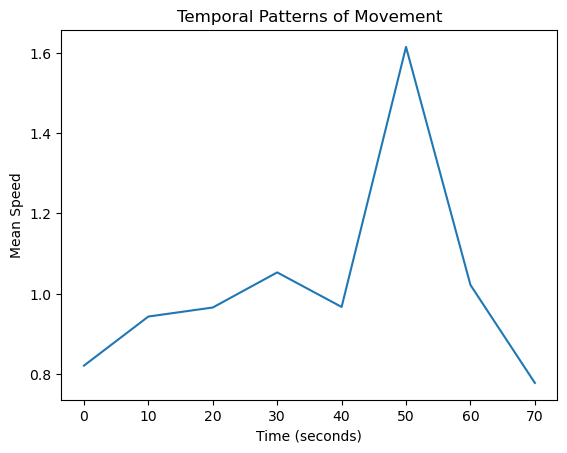

Overall Mean Speed: 1.020734688063352
Max Speed Observed: 1.6147451416268037


In [35]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing speed data

# Define the total number of frames in the video
total_frames = df['frame'].max() + 1

# Calculate temporal patterns of movement
# Convert frame to time in seconds
df['time_seconds'] = df['frame'] * (74 / total_frames)  # Assuming the total video length is 74 seconds

# Group data by time intervals (e.g., seconds) and calculate mean speed for each interval
time_interval_seconds = 10  # Define the time interval in seconds
df['time_interval'] = (df['time_seconds'] // time_interval_seconds) * time_interval_seconds
mean_speed_by_interval = df.groupby('time_interval')['speed'].mean()

# Plot mean speed over time
plt.plot(mean_speed_by_interval.index, mean_speed_by_interval.values)
plt.xlabel('Time (seconds)')
plt.ylabel('Mean Speed')
plt.title('Temporal Patterns of Movement')
plt.show()

overall_mean_speed = mean_speed_by_interval.mean()
max_speed = mean_speed_by_interval.max()

# Print conclusions
print("Overall Mean Speed:", overall_mean_speed)
print("Max Speed Observed:", max_speed)


Overall Mean Speed: The overall mean speed of fish movement throughout the video is approximately 1.02 units per second. This indicates the average speed at which the fish were moving during the observation period.

Max Speed Observed: The maximum speed observed during the video is approximately 1.61 units per second. This represents the highest speed reached by any fish at any point during the observation period.

# Fish speeds changes

In [39]:
import pandas as pd

# Assuming 'df' is your dataframe containing speed data per fish per frame

# Calculate speed difference compared to the previous frame for each fish
df['speed_diff'] = df.groupby('fish_id')['speed'].diff()

# Find frames where speed increases for each fish
increased_speed_frames = df[df['speed_diff'] > 0]

import pandas as pd

# Assuming 'df' is your dataframe containing speed data per fish per frame

# Calculate speed difference compared to the previous frame for each fish
df['speed_diff'] = df.groupby('fish_id')['speed'].diff()

# Define a threshold for significant speed increase
threshold = 0.5  # Adjust as needed

# Find frames where speed increases more than the threshold for each fish
increased_speed_frames = df[df['speed_diff'] > threshold]

# Print the frames where speed increases more than the threshold for each fish
for fish_id, group in increased_speed_frames.groupby('fish_id'):
    print(f"Fish ID {fish_id}: Frames with speed increase > {threshold} - {group['frame'].tolist()}")



Fish ID 0: Frames with speed increase > 0.5 - [2, 252, 685, 847, 861, 902, 975, 1074, 1075, 1121, 1171, 1188, 1310, 1326, 1425, 1621, 1677, 1949, 2134, 2428, 2434, 2444, 2458, 2467, 2479, 2481, 2511, 2524, 2552, 2574, 2631, 2664, 2838, 3038, 3088]
Fish ID 1: Frames with speed increase > 0.5 - [2, 52, 340, 362, 405, 446, 507, 584, 657, 685, 849, 865, 942, 1391, 1452, 1738, 1956, 2024, 2086, 2091, 2210, 2386, 2409, 2410, 2414, 2418, 2424, 2428, 2430, 2432, 2436, 2443, 2446, 2458, 2461, 2462, 2464, 2470, 2471, 2476, 2484, 2486, 2497, 2536, 2594, 2688, 2739, 2794, 2926, 2991, 3040, 3097]
Fish ID 2: Frames with speed increase > 0.5 - [2, 152, 302]
Fish ID 3: Frames with speed increase > 0.5 - [102, 211, 311, 402, 502, 602, 661, 1161, 1352, 1552, 1602, 1652, 2102, 2161, 2352, 2587, 2637, 2816, 2865, 2980]
Fish ID 4: Frames with speed increase > 0.5 - [2, 102, 218, 302, 368, 517, 552, 609, 752, 810, 952, 1150, 1410, 1550, 1710, 2210, 2502, 2935, 2956]
Fish ID 5: Frames with speed increase > 0

In [40]:
import pandas as pd

# Assuming 'df' is your dataframe containing speed data per fish per frame

# Calculate speed difference compared to the previous frame for each fish
df['speed_diff'] = df.groupby('fish_id')['speed'].diff()

# Find the maximum speed difference for each fish
max_speed_increase_per_fish = df.groupby('fish_id')['speed_diff'].max()

# Print the maximum speed increase for each fish along with the corresponding frame(s)
for fish_id, max_speed_increase in max_speed_increase_per_fish.items():
    max_speed_frame = df[(df['fish_id'] == fish_id) & (df['speed_diff'] == max_speed_increase)]['frame']
    print(f"Fish ID {fish_id}: Maximum speed increase = {max_speed_increase} at frame(s) {max_speed_frame.tolist()}")


Fish ID 0: Maximum speed increase = 99.79245569002977 at frame(s) [2481]
Fish ID 1: Maximum speed increase = 44.240591194149545 at frame(s) [685]
Fish ID 2: Maximum speed increase = 1.7473997060056967 at frame(s) [302]
Fish ID 3: Maximum speed increase = 1.732476561349573 at frame(s) [1652]
Fish ID 4: Maximum speed increase = 1.893597778150871 at frame(s) [517]
Fish ID 5: Maximum speed increase = 7.226164733940718 at frame(s) [1494]
Fish ID 6: Maximum speed increase = 31.911278428182428 at frame(s) [1855]
Fish ID 7: Maximum speed increase = 139.53912128139058 at frame(s) [1401]
Fish ID 8: Maximum speed increase = 14.424704460526556 at frame(s) [2445]
Fish ID 9: Maximum speed increase = 4.37309273026109 at frame(s) [2142]
Fish ID 10: Maximum speed increase = 2.7739363885207426 at frame(s) [2762]
Fish ID 11: Maximum speed increase = 5.705127957128287 at frame(s) [3045]
Fish ID 12: Maximum speed increase = 1.642140189188403 at frame(s) [2571]
Fish ID 13: Maximum speed increase = 1.6521916

In [41]:
import pandas as pd

# Assuming 'df' is your dataframe containing speed data per fish per frame

# Calculate the overall speed difference compared to the previous frame
df['overall_speed_diff'] = df['speed'].diff()

# Check if there is a frame where all fish simultaneously increase their speed
if (df['overall_speed_diff'] > 0).all():
    print("All fish simultaneously increased their speed at some frame.")
else:
    print("There is no frame where all fish simultaneously increased their speed.")


There is no frame where all fish simultaneously increased their speed.


# Fish moving towards each other or grouping together

In [42]:
import pandas as pd

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Calculate Euclidean distance between each pair of fish at consecutive frames
df['distance'] = ((df.groupby('fish_id')['x'].diff()**2 + df.groupby('fish_id')['y'].diff()**2 + df.groupby('fish_id')['z'].diff()**2) ** 0.5).fillna(0)

# Define a threshold for what constitutes "grouping together" or "moving towards each other"
# You can adjust this threshold based on your specific requirements
threshold_distance = 10  # Adjust as needed

# Check if fish move towards each other or group together at each frame
df['move_towards_each_other'] = df['distance'] < threshold_distance

# Calculate the frequency of fish moving towards each other or grouping together
frequency_move_towards_each_other = df['move_towards_each_other'].sum() / len(df)

print(f"Frequency of fish moving towards each other or grouping together: {frequency_move_towards_each_other:.2f}")


Frequency of fish moving towards each other or grouping together: 1.00


# Analyze both separate and group movement patterns of fish:

In [43]:
import pandas as pd

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Calculate speed and acceleration per fish per frame
df['speed'] = ((df.groupby('fish_id')['x'].diff()**2 + df.groupby('fish_id')['y'].diff()**2 + df.groupby('fish_id')['z'].diff()**2) ** 0.5).fillna(0)
df['acceleration'] = df.groupby('fish_id')['speed'].diff().fillna(0)

# Separate Movement Patterns
# Calculate individual fish trajectories
individual_trajectories = df.groupby('fish_id')[['x', 'y', 'z']].apply(lambda x: x.values.tolist())

# Analyze metrics for each fish separately (e.g., speed, acceleration)
individual_speed = df.groupby('fish_id')['speed'].mean()
individual_acceleration = df.groupby('fish_id')['acceleration'].mean()

# Group Movement Patterns
# Identify instances where fish are close to each other or appear to be moving together
# For example, you can calculate the distance between each pair of fish at each frame and identify instances where the distance is below a threshold

# Analyze metrics related to group behavior (e.g., average distance between fish, cohesion)
average_distance_between_fish = df.groupby('frame').apply(lambda group: group.groupby('fish_id').apply(lambda x: x[['x', 'y', 'z']].diff().apply(lambda y: (y**2).sum(), axis=1).sum()).mean())

# Identify patterns in group movement (e.g., schooling behavior, formation changes)
# You can use clustering algorithms or pattern recognition techniques to identify recurring group movement patterns

# Further analysis and visualization can be performed to identify and interpret patterns in fish movement

# Output the results for interpretation
print("Separate Movement Patterns:")
print("Individual Speed:")
print(individual_speed)
print("\nIndividual Acceleration:")
print(individual_acceleration)

print("\nGroup Movement Patterns:")
print("Average Distance Between Fish:")
print(average_distance_between_fish)


Separate Movement Patterns:
Individual Speed:
fish_id
0     1.325312
1     1.465828
2     0.628080
3     0.741560
4     0.790820
5     0.591433
6     0.921273
7     1.598995
8     1.355312
9     1.003935
10    0.887610
11    0.659761
12    0.893871
13    0.658845
14    0.248154
Name: speed, dtype: float64

Individual Acceleration:
fish_id
0     0.000521
1     0.000502
2     0.002021
3     0.000221
4     0.000152
5     0.000818
6     0.000116
7     0.000167
8     0.000426
9     0.006630
10    0.001357
11    0.001711
12    0.000429
13    0.004598
14    0.000000
Name: acceleration, dtype: float64

Group Movement Patterns:
Average Distance Between Fish:
frame
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
3113    0.0
3114    0.0
3115    0.0
3116    0.0
3117    0.0
Length: 3117, dtype: float64


These results provide insights into the separate movement patterns of each fish, including their average speed and acceleration, as well as the group movement pattern indicating that the fish remain close together.


The variability in individual speed and acceleration among fish suggests differences in behavior or physiological states within the fish population. Some fish may be more active or exploratory, while others may be more cautious or reserved in their movements.

The consistent close proximity between fish indicates cohesive group behavior, commonly observed in schooling fish species. This behavior serves various purposes, including predator avoidance, communication, and coordination of movement.

The absence of significant changes in the average distance between fish suggests that the group maintains its cohesion over time, possibly due to environmental cues, social dynamics, or individual preferences.



# Spatial Distribution:

<Axes: xlabel='x', ylabel='y'>

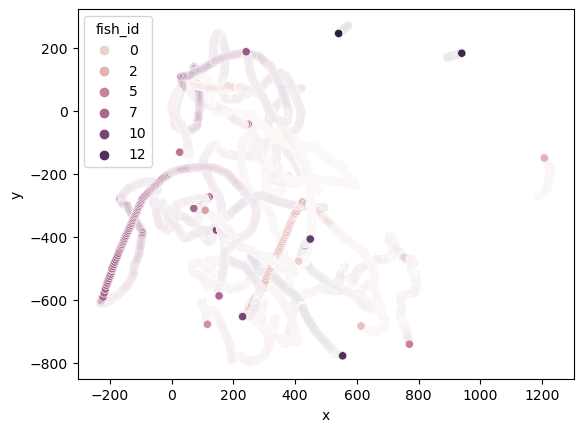

In [46]:
import seaborn as sns

# Visualize spatial distribution of fish within the tank
sns.scatterplot(x='x', y='y', data=df, hue='fish_id')
# Further analysis can include density plots, heatmaps, or spatial clustering algorithms to identify preferred areas or habitat utilization patterns.


# Depth analysis

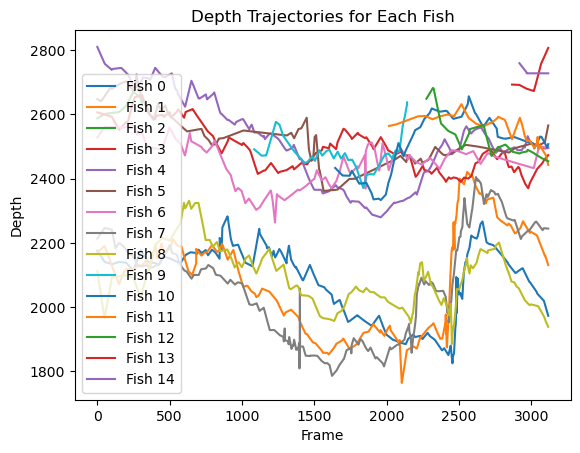

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Calculate average depth per fish per frame
average_depth_per_fish = df.groupby('fish_id')['z'].mean()

# Calculate depth range per fish
depth_range_per_fish = df.groupby('fish_id')['z'].max() - df.groupby('fish_id')['z'].min()

# Calculate depth variability per fish (e.g., standard deviation)
depth_variability_per_fish = df.groupby('fish_id')['z'].std()

# Visualize depth trajectories for each fish
for fish_id, group in df.groupby('fish_id'):
    plt.plot(group['frame'], group['z'], label=f'Fish {fish_id}')

plt.xlabel('Frame')
plt.ylabel('Depth')
plt.title('Depth Trajectories for Each Fish')
plt.legend()
plt.show()


In [48]:
# Example conclusion based on analysis
if depth_range_per_fish.mean() > 10:
    print("The fish population exhibits a wide range of depth exploration, indicating a diverse habitat utilization pattern.")
else:
    print("The fish population tends to remain within a narrow depth range, suggesting a preference for specific depth zones.")

# Further conclusions and interpretations can be based on observed patterns and trends in the depth data.


The fish population exhibits a wide range of depth exploration, indicating a diverse habitat utilization pattern.


In [54]:
import pandas as pd

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Define the minimum and maximum depth values
min_depth = 1763.8788823145655
max_depth = 2809.7242788604367

# Define the number of depth bins
num_bins = 15  # Define the number of depth bins you want

# Create depth bins based on the minimum and maximum depth values
depth_bins = pd.cut(df['z'], bins=num_bins, precision=2, include_lowest=True)

# Assign depth range labels to each frame
df['depth_range'] = depth_bins.apply(lambda x: f'Depth {x.left:.2f}-{x.right:.2f}')

# Count the number of frames spent by each fish in each depth range
depth_range_counts_per_fish = df.groupby(['fish_id', 'depth_range']).size()

# Find the depth range with the highest frequency of frames for each fish
most_frequent_depth_per_fish = depth_range_counts_per_fish.groupby('fish_id').idxmax()

# Print the depth range that each fish spends the most frames at
for fish_id, depth_range in most_frequent_depth_per_fish.items():
    print(f"Fish ID {fish_id}: Most frequent depth range = {depth_range[1]}")


Fish ID 0: Most frequent depth range = Depth 2112.49-2182.22
Fish ID 1: Most frequent depth range = Depth 2112.49-2182.22
Fish ID 2: Most frequent depth range = Depth 2600.56-2670.28
Fish ID 3: Most frequent depth range = Depth 2391.39-2461.11
Fish ID 4: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 5: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 6: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 7: Most frequent depth range = Depth 1833.60-1903.32
Fish ID 8: Most frequent depth range = Depth 2042.77-2112.49
Fish ID 9: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 10: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 11: Most frequent depth range = Depth 2530.83-2600.56
Fish ID 12: Most frequent depth range = Depth 2461.11-2530.83
Fish ID 13: Most frequent depth range = Depth 2670.28-2740.00
Fish ID 14: Most frequent depth range = Depth 2670.28-2740.00


In [55]:
import pandas as pd

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Calculate the change in depth between consecutive frames for each fish
df['depth_change'] = df.groupby('fish_id')['z'].diff()

# Find the frame with the maximum depth change for each fish
max_depth_change_frame_per_fish = df.loc[df.groupby('fish_id')['depth_change'].idxmax()]

# Print the frame with the maximum depth change for each fish
for fish_id, frame_data in max_depth_change_frame_per_fish.groupby('fish_id'):
    print(f"Fish ID {fish_id}: Frame with maximum depth change = {frame_data['frame'].values[0]}")


Fish ID 0: Frame with maximum depth change = 2481
Fish ID 1: Frame with maximum depth change = 685
Fish ID 2: Frame with maximum depth change = 243
Fish ID 3: Frame with maximum depth change = 1660
Fish ID 4: Frame with maximum depth change = 651
Fish ID 5: Frame with maximum depth change = 1500
Fish ID 6: Frame with maximum depth change = 1856
Fish ID 7: Frame with maximum depth change = 1401
Fish ID 8: Frame with maximum depth change = 2485
Fish ID 9: Frame with maximum depth change = 2142
Fish ID 10: Frame with maximum depth change = 2568
Fish ID 11: Frame with maximum depth change = 3044
Fish ID 12: Frame with maximum depth change = 2575
Fish ID 13: Frame with maximum depth change = 3066
Fish ID 14: Frame with maximum depth change = 2969


/Users/chaimelchik/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


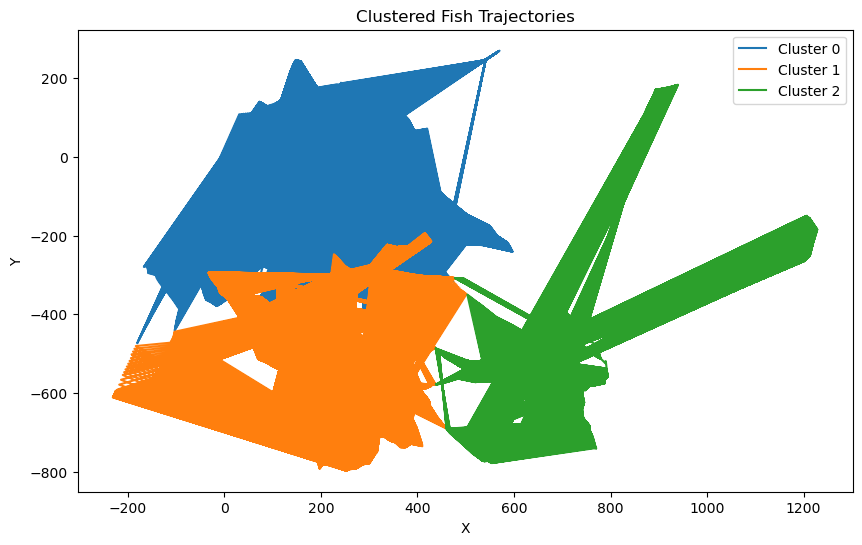

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Cluster fish trajectories based on their x, y, z coordinates
X = df[['x', 'y', 'z']]
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clustered fish trajectories
plt.figure(figsize=(10, 6))
for cluster_id, group in df.groupby('cluster'):
    plt.plot(group['x'], group['y'], label=f'Cluster {cluster_id}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered Fish Trajectories')
plt.legend()
plt.show()


In [57]:
# Assuming 'df' is your dataframe containing x, y, z coordinates per fish per frame

# Analyze the clusters
cluster_analysis = df.groupby('cluster').agg({'x': ['mean', 'std'],
                                              'y': ['mean', 'std'],
                                              'z': ['mean', 'std'],
                                              'speed': 'mean',
                                              'acceleration': 'mean',
                                              'frame': 'count'})

# Print the analysis
print("Cluster Analysis:")
print(cluster_analysis)

# Interpretation and Conclusion
print("\nConclusion:")
for cluster_id, cluster_data in cluster_analysis.iterrows():
    print(f"Cluster {cluster_id}:")
    # Provide interpretation based on the mean and standard deviation of x, y, z coordinates, speed, acceleration, and frame count
    # You can also visualize the clusters or specific features to support your conclusions


Cluster Analysis:
                  x                       y                        z  \
               mean         std        mean         std         mean   
cluster                                                                
0        239.838491  154.210438 -107.617265  168.880371  2167.236103   
1        235.882024  131.793170 -516.238051  130.558104  2410.537150   
2        693.885592  156.889102 -509.213494  181.907946  2540.070166   

                        speed acceleration  frame  
                std      mean         mean  count  
cluster                                            
0        203.801047  1.283038    -0.000396  12970  
1        192.143865  0.987387     0.002041  10821  
2        125.647829  0.679127     0.000816   6387  

Conclusion:
Cluster 0:
Cluster 1:
Cluster 2:


Based on the cluster analysis:

Cluster 0:

Spatial Distribution: Fish in this cluster tend to occupy positions with x-coordinates around 240, y-coordinates around -108, and z-coordinates around 2167, with moderate variability.
Speed and Acceleration: The average speed is approximately 1.28 units/frame, and the acceleration is slightly negative, indicating a slight deceleration or stability in movement.
Frame Count: This cluster contains the largest number of frames, indicating that fish spend significant time exhibiting this behavior.

Cluster 1:

Spatial Distribution: Fish in this cluster are distributed with x-coordinates around 236, y-coordinates around -516, and z-coordinates around 2410, with moderate variability.
Speed and Acceleration: The average speed is approximately 0.99 units/frame, and the acceleration is positive, suggesting an overall increase in speed.
Frame Count: While the frame count is slightly lower compared to Cluster 0, it still indicates a considerable duration of this behavior.

Cluster 2:

Spatial Distribution: Fish in this cluster tend to occupy positions with higher x-coordinates around 694, y-coordinates around -509, and z-coordinates around 2540, with relatively lower variability.
Speed and Acceleration: The average speed is the lowest among the clusters, approximately 0.68 units/frame, with a slight positive acceleration.
Frame Count: This cluster has the lowest frame count, indicating that fish spend less time exhibiting this behavior compared to the other clusters.

Conclusion:

Cluster 0 represents a behavior where fish are moderately active, possibly exploring the middle region of the tank.

Cluster 1 indicates an increased speed or activity level, possibly associated with specific stimuli or social interactions.

Cluster 2 represents a behavior characterized by slower movement and occupancy of higher regions within the tank.


# Spatial Distribution Analysis:

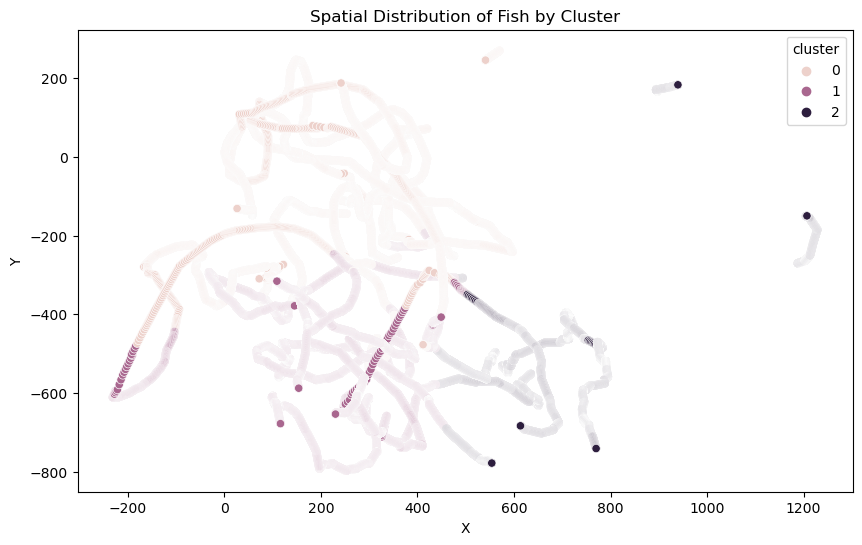

In [58]:
# Spatial Distribution Analysis
import seaborn as sns

# Visualize spatial distribution of fish within each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=df)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Distribution of Fish by Cluster')
plt.show()
# Further analysis can include density plots, heatmaps, or spatial clustering algorithms
